## Experiments to verify analytical expression for MSE of Avg Predictor

In [ ]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt


In [3]:
def gen_rand_ortho_haar(n):
    """
    Generate a random orthogonal matrix using QR decomposition.
    :param n: Size of the matrix
    :return: Random orthogonal matrix of size n x n
    """
    # Generate a random matrix
    A = (np.random.randn(n, n) + 1j * np.random.randn(n, n)) / np.sqrt(2)
    
    # Perform QR decomposition
    Q, R = np.linalg.qr(A)

    d = np.diag(R)
    d = d/np.abs(d)
    # print("d", d)
    # print("R/d", R/d)
    # Construct the diagonal matrix D
    D = np.diag(d)
    Q = Q @ D
    
    return Q

def gen_rand_ortho_haar_real(n):
    """
    Generate a random orthogonal matrix using QR decomposition.
    :param n: Size of the matrix
    :return: Random orthogonal matrix of size n x n
    """
    # Generate a random matrix
    A = np.random.randn(n, n)
    
    # Perform QR decomposition
    Q, R = np.linalg.qr(A)

    d = np.diag(R)
    d = d/np.abs(d)
    # print("d", d)
    # print("R/d", R/d)
    # Construct the diagonal matrix D
    D = np.diag(d)
    Q = Q @ D
    
    return Q

def gen_rand_ortho(n):
    A = np.random.randn(n,n)
    Q, R = np.linalg.qr(A)

    return Q

def twod_rotation():
    """
    Generate a random 2D rotation matrix.
    """
    theta = np.random.uniform(0, 2 * np.pi)  # Random angle in radians
    #point a unit vector in the direction of theta
    x = np.array([np.cos(theta), np.sin(theta)])

    #generate a random 2d vector
    y = np.random.randn(2)
    y = y - (np.dot(y, x)/np.dot(x, x))*x
    y = y/np.linalg.norm(y)

    assert np.isclose(np.dot(x, y), 0), "x and y are not orthogonal"

    #generate a rademacher random variable
    r = np.random.choice([-1, 1])
    Q = np.array([[x[0], r*y[0]], [x[1], r*y[1]]])

    #check that Q is orthogonal
    assert np.isclose(Q.T @ Q, np.eye(2)).all(), "Q is not orthogonal"

    return Q


def complex_to_exponential(z):
    """
    Converts a complex number into its complex exponential form.

    Args:
        z (complex): A complex number.

    Returns:
        tuple: A tuple (r, theta) where r is the magnitude and theta is the phase angle in radians.
    """
    r = abs(z)  # Magnitude of the complex number
    theta = cmath.phase(z)  # Phase angle in radians
    return r, theta

In [23]:
n = 5

A = gen_rand_ortho_haar_real(n)
print("A:", A)
print("A^T*A:", A.T @ A)

Pi = np.eye(n)/n
samp = int(1e5)
x0 = np.random.multivariate_normal(np.zeros(n), Pi, size = samp)
print("shape of x0:", x0.shape)

A: [[-1.37595622e-01 -7.32461780e-01 -7.88926263e-03 -4.54246557e-01
   4.88021527e-01]
 [ 2.18824299e-01  5.03357833e-01 -1.12012596e-01 -8.27122082e-01
   4.54868978e-02]
 [-1.82348168e-01  2.90988690e-01  8.30715106e-01  4.03383295e-02
   4.36302601e-01]
 [ 3.81525967e-01  2.19339548e-01 -3.95657809e-01  3.28483765e-01
   7.36125949e-01]
 [ 8.68545021e-01 -2.78112167e-01  3.75177623e-01  6.01703057e-04
  -1.65905272e-01]]
A^T*A: [[ 1.00000000e+00 -8.77207781e-17  1.38328934e-18 -7.66922913e-17
   1.29361193e-16]
 [-8.77207781e-17  1.00000000e+00  4.63339012e-17 -2.68373411e-16
   9.76582612e-17]
 [ 1.38328934e-18  4.63339012e-17  1.00000000e+00 -1.08424777e-16
  -3.83968801e-17]
 [-7.66922913e-17 -2.68373411e-16 -1.08424777e-16  1.00000000e+00
  -2.05576082e-16]
 [ 1.29361193e-16  9.76582612e-17 -3.83968801e-17 -2.05576082e-16
   1.00000000e+00]]
shape of x0: (100000, 5)


In [ ]:
mats = int(1e2)

T = 10
avg_predictor_err = np.zeros((mats,T))
zero_predictor_err = np.zeros((mats,T))
analytical_mse = np.zeros((mats,T))
avg_err = 0
zero_err = 0

for mat in range(mats):
    A = gen_rand_ortho_haar_real(n)
    for t in range(T):
        for i in range(samp):
            avg_err += np.linalg.norm(x0[i] - 0.5*(x0[i] + A @ x0[i]))**2
            zero_err += np.linalg.norm(x0[i])**2
        
        avg_err /= samp
        zero_err /= samp
        avg_predictor_err[mat, t] = avg_err
        zero_predictor_err[mat, t] = zero_err
        analytical_mse[mat, t] = 0.5*(1 - (1/5)*np.trace(A))

avg_predictor_err = np.mean(avg_predictor_err, axis = 0)
zero_predictor_err = np.mean(zero_predictor_err, axis = 0)
analytical_mse = np.mean(analytical_mse, axis = 0)

In [ ]:
#plot the average predictor error

plt.plot(np.arange(T), avg_predictor_err, label='Average Predictor', marker='x')
plt.plot(np.arange(T), zero_predictor_err, label='Zero Predictor', marker='x')
plt.plot(np.arange(T), analytical_mse, label='Analytical Average Predictor MSE', linestyle='--', marker='o')
plt.legend()
plt.xlabel('Step')
plt.ylabel('Mean Prediction Squared Error')
plt.grid()
plt.show()

NameError: name 'T' is not defined

In [28]:
samp = int(1e4)
analytical_mse = []
trace = []
As = np.zeros((n,n))
A_trace = []
eigs = []
sum = 0
trace_sum = 0
for i in range(samp):
    A = gen_rand_ortho_haar_real(n)
    # As += A
    # A_trace.append(np.trace(As/(i+1)))
    trace_sum += np.trace(A)
    trace.append(trace_sum/(i+1))
    
    eig = np.linalg.eigvals(A)
    for e in eig:
        r, e = complex_to_exponential(e)
        eigs.append(e)
    
    sum += 0.5*(1 - (1/n)*np.trace(A))
    analytical_mse.append(sum/(i+1))


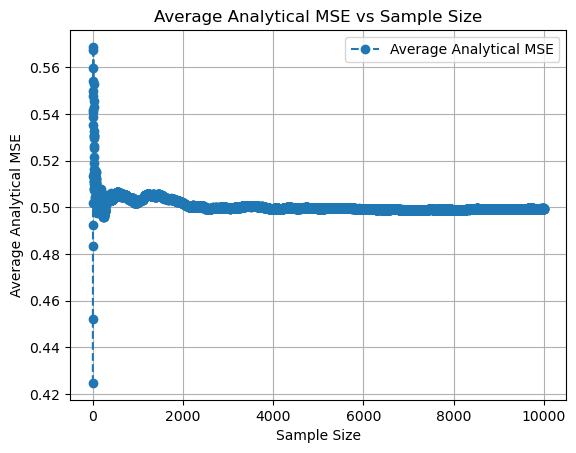

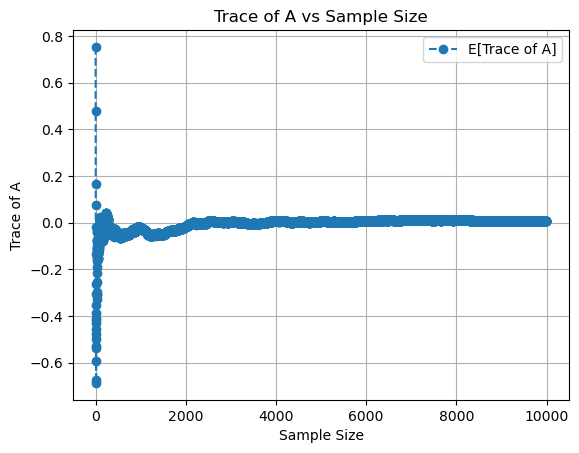

In [29]:
#plot the analytical average predictor error
plt.plot(np.arange(samp), analytical_mse, label='Average Analytical MSE', linestyle='--', marker='o')
plt.legend()
plt.xlabel('Sample Size')
plt.ylabel('Average Analytical MSE')
plt.title('Average Analytical MSE vs Sample Size')
plt.grid()
plt.show()

plt.plot(np.arange(samp), trace, label='E[Trace of A]', linestyle='--', marker='o')
# plt.plot(np.arange(samp), A_trace, label='Trace of E[A}', linestyle='--', marker='o')
plt.legend()
plt.xlabel('Sample Size')
plt.ylabel('Trace of A')
plt.title('Trace of A vs Sample Size')
#make the y ticks finer
# plt.yticks(np.arange(-1, 2, 0.1))
plt.grid()
plt.show()

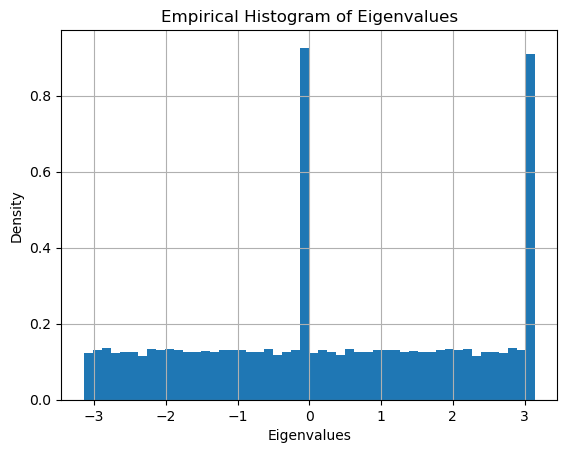

In [30]:
#plot the empirical histogram of the eigenvalues
plt.hist(np.real(eigs), bins=50, density=True)
plt.xlabel('Eigenvalues')
plt.ylabel('Density')
plt.title('Empirical Histogram of Eigenvalues')
plt.grid()
plt.show()

In [17]:
x = np.array([[1], [0]])

naives = []
Qs = []
haars = []

samples = 100

for samp in range(samples):
    naive = twod_rotation()
    naives.append(naive@x)

    Q = gen_rand_ortho(2)
    Qs.append(Q@x)

    haar = gen_rand_ortho_haar_real(2)
    haars.append(haar@x)




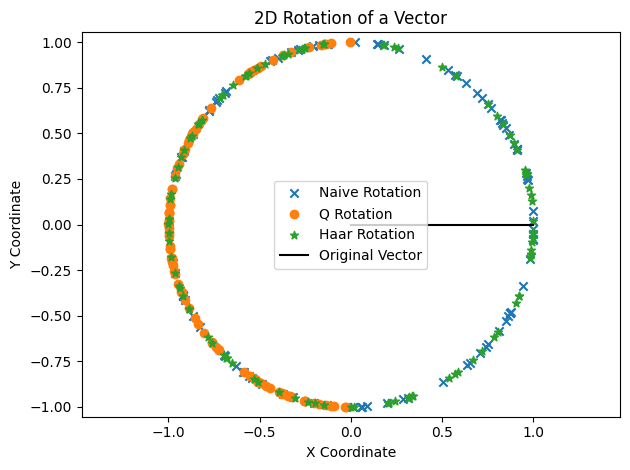

In [18]:
#plot naives where the first entry is the x coordinate and the second entry is the y coordinate for every vector in the list
naives = np.array(naives)
plt.scatter(naives[:,0], naives[:,1], label='Naive Rotation', marker='x')
#plot Qs where the first entry is the x coordinate and the second entry is the y coordinate for every vector in the list
Qs = np.array(Qs)
plt.scatter(Qs[:,0], Qs[:,1], label='Q Rotation', marker='o')
#plot haars where the first entry is the x coordinate and the second entry is the y coordinate for every vector in the list
haars = np.array(haars)
plt.scatter(haars[:,0], haars[:,1], label='Haar Rotation', marker='*')
#plot the original vector as a black line
plt.plot([0, x[0,0]], [0, x[1,0]], label='Original Vector', color='black')
plt.legend()
plt.title('2D Rotation of a Vector')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
#make the plot square
plt.axis('equal')
plt.tight_layout()
plt.show()
